In [1]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from hmc_model import HMC_model

In [2]:
# Define a multivariate Gaussian log-likelihood function
def multivariate_gaussian_log_likelihood(theta):
    mu = jnp.array([0.0, 1.0, -1.0])  # means for each parameter
    sigma = jnp.array([1.0, 2.0, 0.5])  # standard deviations for each parameter
    return -0.5 * jnp.sum(((theta - mu) / sigma)**2)

In [3]:
# Define the parameter bounds for three parameters
theta_bounds = np.array([[-10, -10, -10], [10, 10, 10]])

# Create an instance of the HMC_model class
mc_model = HMC_model(multivariate_gaussian_log_likelihood, theta_bounds)

In [4]:
# Set initial parameters
initial = np.array([9.0, -7.0, 8.5])  # Initial guesses for the parameters

# Run the HMC model
mc_model.run(initial, niter=3000, nwarmup=500)

sample: 100%|██████████| 3500/3500 [01:28<00:00, 39.76it/s, 3 steps of size 8.73e-01. acc. prob=0.91] 


In [5]:
# Get the results
theta_max = mc_model.get_theta_max()
theta_median = mc_model.get_theta_median()

print(f"Max Likelihood Estimate of theta: {theta_max}")
print(f"Median of theta: {theta_median}")

Max Likelihood Estimate of theta: [ 0.04682839  0.9660709  -1.0392863 ]
Median of theta: [ 0.04296245  0.9824275  -0.9912133 ]


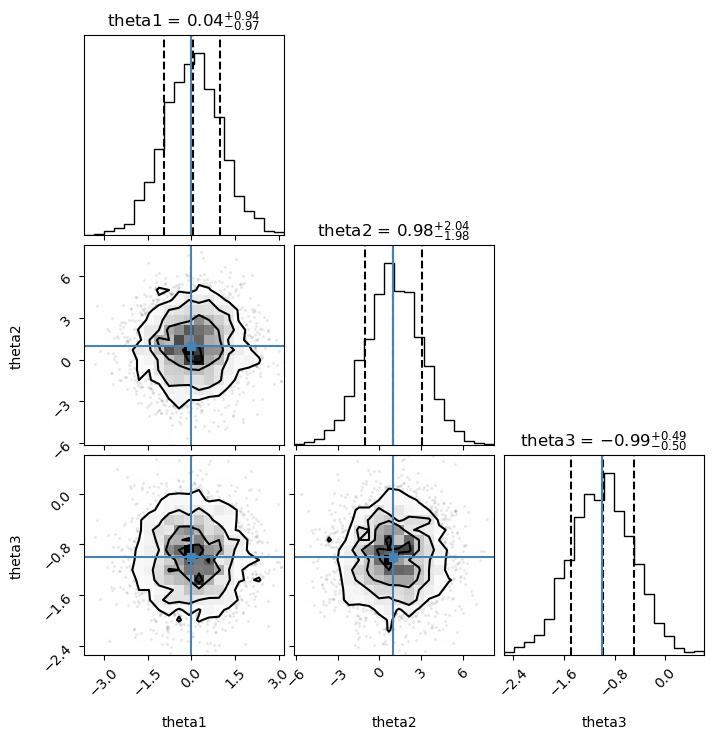

In [6]:
# Show corner plot
labels = ['theta1', 'theta2', 'theta3']
mc_model.show_corner_plot(labels, truths=[0, 1, -1])
plt.show()

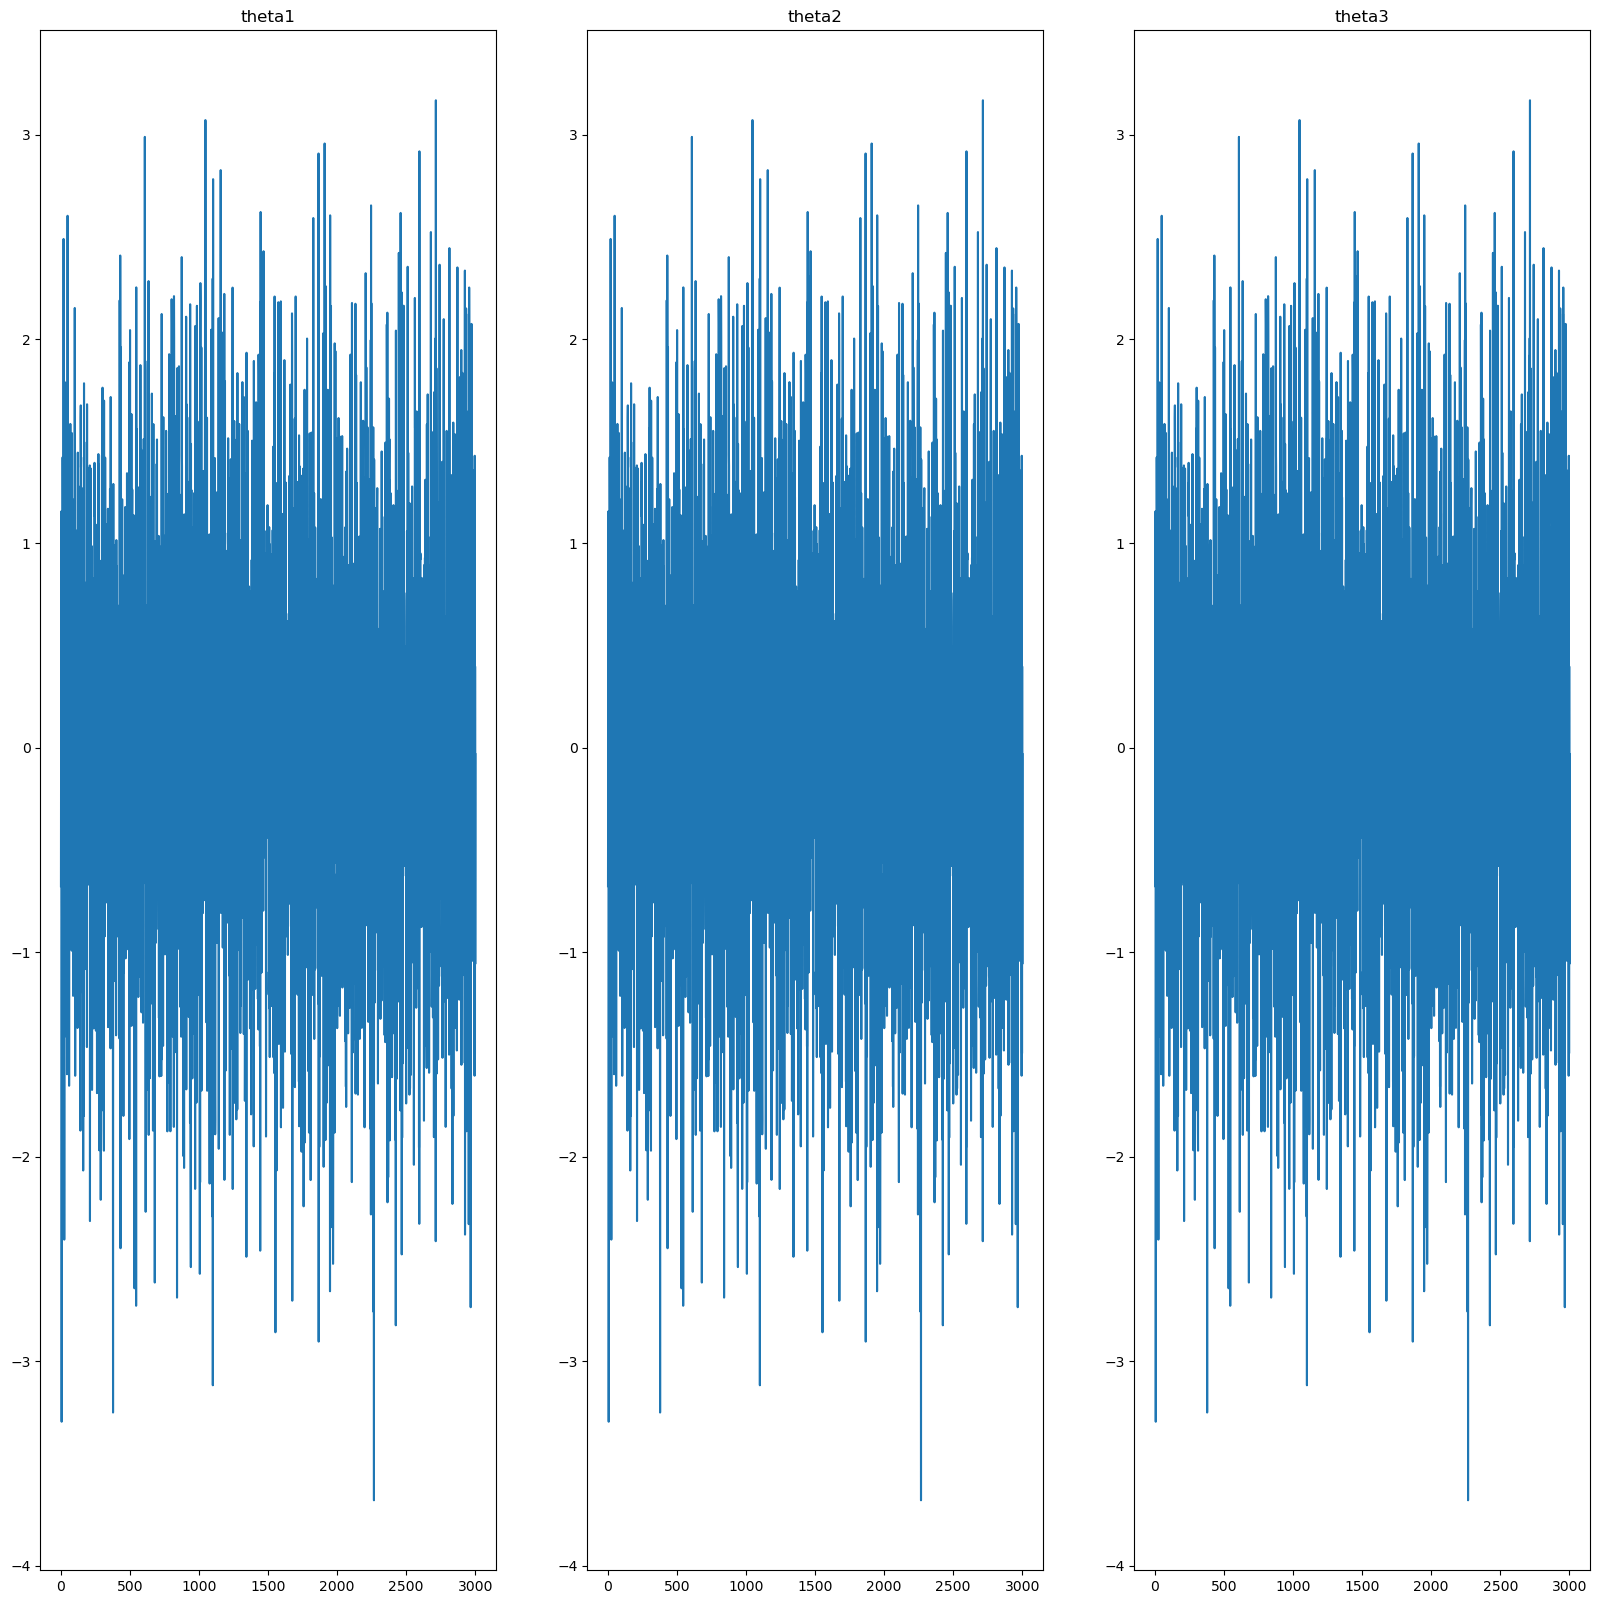

In [7]:
mc_model.plot_results(labels)
plt.show()